**1. Import 'titanic.csv' as pd.DataFrame and look at first 5 lines.**

In [71]:
import pandas as pd

In [72]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**2. How many passengers belonged to Pclass 3?**

In [31]:
len(df[df.Pclass == 3])

491

**2.1 What was the mean age for Pclass 1,2 and 3?**

In [150]:
for pcl in [1,2,3]:
    print(f'class:{pcl} mean_age:{df[df.Pclass == pcl].Age.mean()}')

class:1 mean_age:38.233440860215055
class:2 mean_age:29.87763005780347
class:3 mean_age:25.14061971830986


**3. How many people from Pclass 3 survived?**

In [37]:
len(df[(df.Pclass == 3) & (df.Survived == 1)])

119

**4. Show first 5 line of subtable containing only Pclass and Survived.**

In [40]:
df[['Pclass', 'Survived']].head()

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0


**5. Plot 4 graphs in 1 figure (2x2). Age distribution for females who survied/died and same two plots for males (drop all NaN lines).**"

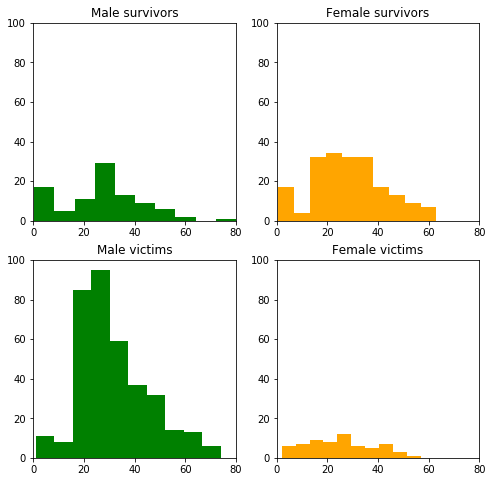

In [145]:
fsurv = df.Age[(df.Sex == 'female') & (df.Survived == 1)].dropna()
fdied = df.Age[(df.Sex == 'female') & (df.Survived == 0)].dropna()

msurv = df.Age[(df.Sex == 'male') & (df.Survived == 1)].dropna()
mdied = df.Age[(df.Sex == 'male') & (df.Survived == 0)].dropna()

fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(figsize=(8, 8), nrows=2, ncols=2)

ax1.hist(msurv, color='green', bins=10)
ax1.set(title='Male survivors', xlim=[0,80], ylim=[0,100])

ax2.hist(fsurv, color='orange', bins=10)
ax2.set(title='Female survivors', xlim=[0,80], ylim=[0,100])

ax3.hist(mdied, color='green', bins=10)
ax3.set(title='Male victims',xlim=[0,80], ylim=[0,100])

ax4.hist(fdied, color='orange', bins=10)
ax4.set(title='Female victims', xlim=[0,80], ylim=[0,100])

plt.show()

**6.  Use groupby method to explore how many people survived(%) or died from all separate groups. Save result table to a new variable.**

In [70]:
result = df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()
result

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363



**7. Plot (use object oriented style) surviving rate for diferent Pclasses as a bar plot. Use some ylabel,xlabel and title to describe your graph. Don't use legend.**

In [43]:
import matplotlib.pyplot as plt

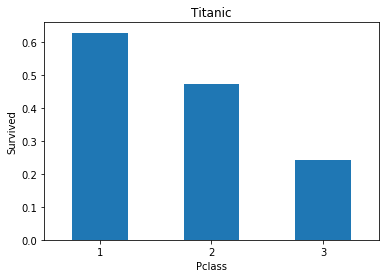

In [68]:
ax = result.plot.bar(legend=False)
ax.set_title('Titanic')
ax.set_ylabel("Survived")
ax.set_xticklabels(result.index,rotation='horizontal')
plt.savefig('Survival.pdf')